
## **Self-Organizing Map**

Self-organizing map (SOM) is a neural network-based dimensionality reduction algorithm generally used to represent a high-dimensional dataset as two-dimensional discretized pattern. Reduction in dimensionality is performed while retaining the topology of data present in the original feature space.

<img src = "https://miro.medium.com/max/655/1*QG7afWQKjY3IpezhNQMzBg.png">

## **The Algorithm:**
1. Each node’s weights are initialized.
2. A vector is chosen at random from the set of training data.
3. Every node is examined to calculate which one’s weights are most like the input vector. 
4. The winning node is commonly known as the Best Matching Unit (BMU).
5. Then the neighbourhood of the BMU is calculated. The amount of neighbors decreases over time.
The winning weight is rewarded with becoming more like the sample vector. The nighbors also become more like the sample vector. The closer a node is to the BMU, the more its weights get altered and the farther away the neighbor is from the BMU, the less it learns.
6. Repeat step 2 for N iterations.

For Professional Engineers & Researchers, click [here](https://www.sciencedirect.com/science/article/pii/S1110016814000970)

**Best Matching Unit** is a technique which calculates the distance from each weight to the sample vector, by running through all weight vectors. The weight with the shortest distance is the winner. There are numerous ways to determine the distance, however, the most commonly used method is the Euclidean Distance, and that’s what is used in the following implementation.

This example illustrates the fitted Self-Organizing Map
for various datasets as well as the resulting neighboring structure between clusters.




In [ ]:
!pip install som-learn

## **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.base import clone    #to duplicate an estimator in order to use it on multiple data sets
from sklearn.datasets import make_blobs, make_s_curve, make_swiss_roll
from somlearn import SOM
print(__doc__)

Automatically created module for IPython interactive environment


## **Generating Data**

We are generating a variety of datasets that cover different scenarios.
More specifically, a basic dataset with three similar clusters, an
anisotropic variation of the previous case, another varition with unequal
variance a dataset with unevenly sized blobs and the S curve and swiss roll
datasets.



In [ ]:
RANDOM_STATE = 170
N_SAMPLES = 500
NAMES = [
    'Basic',
    'Anisotropic',
    'Unequal Variance',
    'Uneven Blobs',
    'S Curve',
    'Swiss Roll',
]


def generate_data(name):
    """Generate data for various cases."""
    if name in ('Basic', 'Anisotropic', 'Uneven Blobs'):
        X, y = make_blobs(n_samples=N_SAMPLES, random_state=RANDOM_STATE, centers=4)
    
    if name == 'Anisotropic':
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
    elif name == 'Unequal Variance':
        X, _ = make_blobs(
            n_samples=N_SAMPLES, cluster_std=[1.0, 2.5, 0.5], random_state=RANDOM_STATE
        )
    elif name == 'Uneven Blobs':
        X = np.vstack((X[y == 0][:150], X[y == 1][:50], X[y == 2][:10]))
    elif name == 'S Curve':
        X, _ = make_s_curve(n_samples=N_SAMPLES, random_state=RANDOM_STATE)
        X = X[:, [0, 2]]
    elif name == 'Swiss Roll':
        X, _ = make_swiss_roll(n_samples=N_SAMPLES, random_state=RANDOM_STATE)
        X = X[:, [0, 2]]
    return X


In [ ]:
Xs = [generate_data(name) for name in NAMES]

## **Defining our SOM Model**

In [ ]:
CLUSTERER = SOM(n_columns=2, n_rows=2, gridtype='hexagonal', random_state=RANDOM_STATE)

# **Plot datasets with cluster labels**




We plot the datasets and the cluster labels predicted by Self-Organizing Map.



In [ ]:
def plot_data(X, som_clusterer, title, ind):
    """Plot data with cluster labels."""
    y_pred = som_clusterer.fit_predict(X)
    plt.subplot(321 + ind)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title(title)

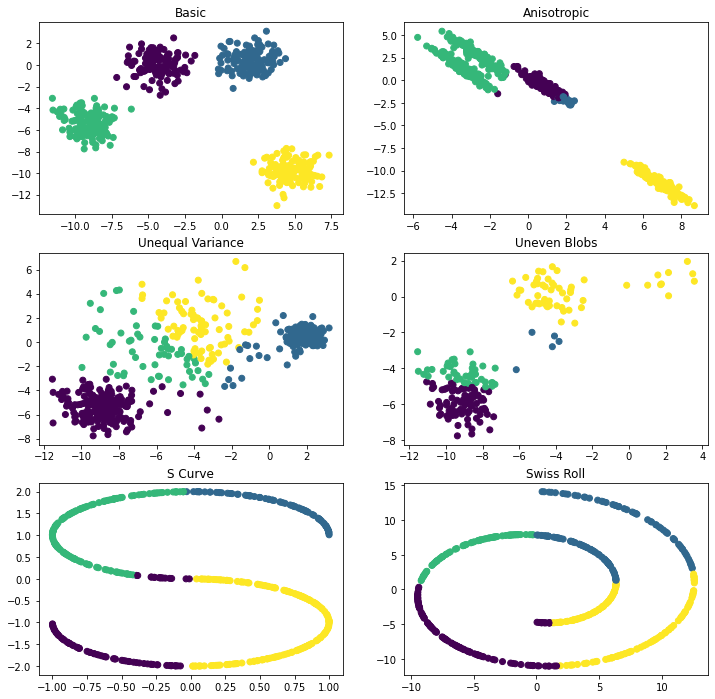

In [ ]:
plt.figure(figsize=(12, 12))
for ind, (X, title) in enumerate(zip(Xs, NAMES)):
    clusterer = clone(CLUSTERER)
    plot_data(X, clusterer, title, ind)
plt.show()